Zadanie 1

In [5]:
import fastparquet
import pandas as pd
import numpy

df0 = pd.read_parquet('0000.parquet', engine='fastparquet')
df1 = pd.read_parquet('0001.parquet', engine='fastparquet')
df2 = pd.read_parquet('0002.parquet', engine='fastparquet')

df = pd.concat([df0, df1, df2])

display(df.head())
df.info()

,sid,sid_profile,post_id,profile_id,date,post_type,description,likes,comments,username,bio,following,followers,num_posts,is_business_account,lang,category
0,28370919,3496776,BXdjjUlgcgq,2237947779,2017-08-06 20:06:57,2,Wreckloose! Deevalley bike park laps on the @i...,80,0,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,travel_&_adventure
1,13623950,3496776,BeyPed5hKj9,2237947779,2018-02-04 19:35:20,1,The dirty south was prime today. Top day with ...,86,2,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,diaries_&_daily_life
2,28370905,3496776,Bunhd1DFVAG,2237947779,2019-03-05 08:03:11,1,Tech Tuesday. Been flat out on the tools. Got ...,168,3,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,science_&_technology
3,28370907,3496776,Bppi85gliQK,2237947779,2018-11-01 20:17:41,1,"On the tools, my favourite wheel builds @stans...",102,2,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,diaries_&_daily_life
4,32170690,3496776,BuDfIyslzfw,2237947779,2019-02-19 08:10:11,1,Solid effort on the bar turn.\nFully turned.\n...,145,2,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,diaries_&_daily_life


<class 'pandas.core.frame.DataFrame'>
Index: 3442074 entries, 0 to 1147357
Data columns (total 17 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   sid                  int64 
 1   sid_profile          int64 
 2   post_id              object
 3   profile_id           int64 
 4   date                 object
 5   post_type            int64 
 6   description          object
 7   likes                int64 
 8   comments             int64 
 9   username             object
 10  bio                  object
 11  following            int64 
 12  followers            int64 
 13  num_posts            int64 
 14  is_business_account  bool  
 15  lang                 object
 16  category             object
dtypes: bool(1), int64(9), object(7)
memory usage: 449.7+ MB


In [6]:
sum(df.memory_usage())

471564138

In [7]:
sum(df.memory_usage(deep=True))

4482771770

In [8]:
def sizeof_fmt(num, suffix="B"):
    for unit in ("", "Ki", "Mi", "Gi", "Ti", "Pi", "Ei", "Zi"):
        if abs(num) < 1024.0:
            return f"{num:3.1f}{unit}{suffix}"
        num /= 1024.0
    return f"{num:.1f}Yi{suffix}"

In [9]:
sizeof_fmt(sum(df.memory_usage(deep=True)))

'4.2GiB'

Zadanie 2

In [10]:
pd.options.display.float_format = '{:.5f}'.format
df.describe()

,sid,sid_profile,profile_id,post_type,likes,comments,following,followers,num_posts
count,3442074.00000,3442074.00000,3442074.00000,3442074.00000,3442074.00000,3442074.00000,3442074.00000,3442074.00000,3442074.00000
mean,22269252.88140,2868296.88322,2355897590.10069,1.02010,558.96598,10.56862,1338.81915,32632.11250,1135.14395
std,11839775.05506,1126418.77616,3074232398.50803,0.14039,8443.96742,193.37135,3529.06256,959166.43043,2481.19164
min,6025.00000,-1.00000,4.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,10929051.25000,2384254.00000,192033504.75000,1.00000,21.00000,0.00000,396.00000,380.00000,152.00000
50%,20246478.00000,3323236.00000,792471554.00000,1.00000,50.00000,2.00000,805.00000,927.00000,458.00000
75%,34693174.25000,3607572.00000,3649194749.00000,1.00000,138.00000,6.00000,1533.00000,2464.00000,1194.00000
max,43330528.00000,4510785.00000,14993736848.00000,3.00000,3311246.00000,173988.00000,1190947.00000,285457645.00000,183730.00000


In [11]:
import numpy as np 

df_opt = df.copy()

df_opt['sid'] = df['sid'].astype(np.int32)
df_opt['date'] = pd.to_datetime(df['date'])
df_opt['post_type'] = df['post_type'].astype('category')
df_opt['description'] = df['description'].astype('category')
df_opt['likes'] = df['likes'].astype(np.int32)
df_opt['comments'] = df['comments'].astype(np.int32)
df_opt['username'] = df['username'].astype('category')
df_opt['bio'] = df['bio'].astype('category')
df_opt['following'] = df['following'].astype(np.int32)
df_opt['followers'] = df['followers'].astype(np.int32)
df_opt['num_posts'] = df['num_posts'].astype(np.int32)
df_opt['lang'] = df['lang'].astype('category')
df_opt['category'] = df['category'].astype('category')

sizeof_fmt(sum(df_opt.memory_usage(deep=True)))

'2.9GiB'

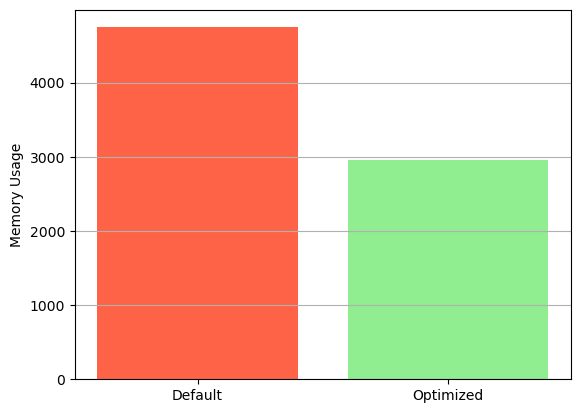

In [16]:
import matplotlib.pyplot as plt

default_memory_usage = sum(df.memory_usage(deep=True))/(1024**2)
optimized_memory_usage = sum(df_opt.memory_usage(deep=True))/(1024**2)

plt.bar(['Default', 'Optimized'], 
        [default_memory_usage, optimized_memory_usage], color=['tomato', 'lightgreen'])

plt.ylabel('Memory Usage')
plt.grid(True, axis='y')

plt.show()

Zadanie 3

In [19]:
from datetime import datetime

start = datetime.now()
display(df[df['followers']>25000].groupby(['category']).agg({'likes':'sum', 'comments':'sum', 'num_posts':'sum'}))
print(f'Time: {datetime.now() - start}')

,likes,comments,num_posts
category,,,
arts_&_culture,59109431,704096,50033727
business_&_entrepreneurs,21020521,390311,18112087
celebrity_&_pop_culture,66063129,797563,38205071
diaries_&_daily_life,483125782,6034860,191451924
family,29335386,360539,10331235
fashion_&_style,145785665,1886377,78107869
film_tv_&_video,90144878,1213809,35916189
fitness_&_health,15680892,275722,12714286
food_&_dining,106486945,1791207,131629949


Time: 0:00:00.133572


In [21]:
start = datetime.now()
display(df_opt[df_opt['followers']>25000].groupby(['category']).agg({'likes':'sum', 'comments':'sum', 'num_posts':'sum'}))
print(f'Time: {datetime.now() - start}')

C:\Users\Natalia\AppData\Local\Temp\ipykernel_15540\85359120.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df_opt[df_opt['followers']>25000].groupby(['category']).agg({'likes':'sum', 'comments':'sum', 'num_posts':'sum'}))


,likes,comments,num_posts
category,,,
arts_&_culture,59109431,704096,50033727
business_&_entrepreneurs,21020521,390311,18112087
celebrity_&_pop_culture,66063129,797563,38205071
diaries_&_daily_life,483125782,6034860,191451924
family,29335386,360539,10331235
fashion_&_style,145785665,1886377,78107869
film_tv_&_video,90144878,1213809,35916189
fitness_&_health,15680892,275722,12714286
food_&_dining,106486945,1791207,131629949


Time: 0:00:00.064363


Zadanie 4

In [23]:
df_opt.to_csv('df.csv', header=True, index=False)

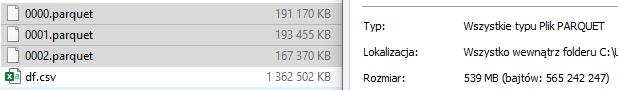

Zadanie 5

In [24]:
def count_time(func):
    def wrapper(*args, **kwargs):
        start = datetime.now()
        func(*args, **kwargs)
        print(f"Czas wczytywania {func.__name__}: {datetime.now() - start} sekund")
        return func(*args, **kwargs)
    return wrapper

@count_time
def read_all():
    return pd.read_csv('df.csv', header=0)

@count_time
def read_chunk():
    chunks = pd.read_csv('df.csv', header=0, chunksize=2_000_000)
    return pd.concat(chunks)

In [26]:
df1 = read_all()

Czas wczytywania read_all: 0:00:29.100294 sekund


In [27]:
df2 = read_chunk()

Czas wczytywania read_chunk: 0:00:30.669238 sekund
